# 15. Algunas librerías de utilidad en Python


## 1. Numpy

Es una de las librerías más conocidas para realizar computación científica en python. Provee una libería de alto rendimiento para la manipulación de arreglos en varias dimensiones. Y ofrece herramientas para trabajar en arreglos.


### 1.1 Arrays en numpy

Un arreglo en numpy es una retícula de valores del mismo tipo indexadas por enteros no negativos. El número de dimensiones ```rank``` y la forma ```shape``` del arreglo es una tupla de enteros que da el tamaño del arreglo para cada dimensión.

Se pueden crear arreglos de numpy desde listas de python y acceder a los elementos con el operador subscript ```[]```


In [25]:
import numpy as np

a = np.array(list(range(1,5)))   # Create a rank 1 array
print(type(a))            # Prints "<class 'numpy.ndarray'>"
print(a.shape)            # Prints "(4,)" porque es una dimensión de tamaño 4
print(a[0], a[1], a[2])   
a[0] = -4                  
print(a)                  

b = np.array([[1,2,3,5,6],[4,5,6,7,8]])    # Create a rank 2 array
print(b.shape)                     
b[0,0] = 1590
print(b[0, 0], b[0, 1], b[1, 0])   

<class 'numpy.ndarray'>
(4,)
1 2 3
[-4  2  3  4]
(2, 5)
1590 2 4


Es posible crear arreglos de diferente tipo de forma muy rápida:

In [53]:
import numpy as np

a = np.zeros((2,3,4))   # Crea un arreglo de ceros de 3 dimensiones 
print(a.shape)        
print(a)  
print('---------')

b = np.ones((2,3))    # Crea un arreglo de 1
print(b.shape)
print(b)
print('---------')

c = np.full((3), 7)  # Crea un arreglo de rango 1 con contenido 7
print(c.shape)
print(c)
print('---------')
        
d = np.eye(3)         # Crea un arreglo identidad de 3 x 3
print(d.shape)
print(d)              
print('---------')

e = np.random.random((2,3))  # Crea un arreglo de rango 3 con valores al azar
print(e.shape)
print(e)                    
                            

(2, 3, 4)
[[[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]

 [[0. 0. 0. 0.]
  [0. 0. 0. 0.]
  [0. 0. 0. 0.]]]
---------
(2, 3)
[[1. 1. 1.]
 [1. 1. 1.]]
---------
(3,)
[7 7 7]
---------
(3, 3)
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
---------
(2, 3)
[[0.53531825 0.33951771 0.60249827]
 [0.57445358 0.61974161 0.74373077]]


El operador subscript funciona en numpy

In [61]:
import numpy as np

# Create the following rank 2 array with shape (3, 4)
a = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])
print(a)
b = a[:2, 1:3]
print(b)

print('------------------------')

# modificar una porción del array b cambia el contenido de a
b[0, 0] = -11     # b[0, 0] is the same piece of data as a[0, 1]
print(b)
print(a)
print(a[0, 1])   # Prints "-11"


[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]
[[2 3]
 [6 7]]
------------------------
[[-11   3]
 [  6   7]]
[[  1 -11   3   4]
 [  5   6   7   8]
 [  9  10  11  12]]
-11


Se puede mezclar indexado entero con indexado por partes. Esto retornará un arreglo de menor dimensionalidad que el arreglo original.

In [66]:
import numpy as np

a = np.array([[1,2,3,4], [5,6,7,8], [9,10,11,12]])

print(a)
print(a.shape)
print('-----------------')
# Two ways of accessing the data in the middle row of the array.
# Mixing integer indexing with slices yields an array of lower rank,
# while using only slices yields an array of the same rank as the
# original array:
row_r1 = a[1, :]    # Rank 1 view of the second row of a
row_r2 = a[1:2, :]  # Rank 2 view of the second row of a
print(row_r1, row_r1.shape)  # Prints "[5 6 7 8] (4,)"
print(row_r2, row_r2.shape)  # Prints "[[5 6 7 8]] (1, 4)"

# We can make the same distinction when accessing columns of an array:
col_r1 = a[:, 1]
col_r2 = a[:, 1:2]
print(col_r1, col_r1.shape)  # Prints "[ 2  6 10] (3,)"
print(col_r2, col_r2.shape)  # Prints "[[ 2]
                             #          [ 6]
                             #          [10]] (3, 1)"

[[ 1  2  3  4]
 [ 5  6  7  8]
 [ 9 10 11 12]]
(3, 4)
-----------------
[5 6 7 8] (4,)
[[5 6 7 8]] (1, 4)
[ 2  6 10] (3,)
[[ 2]
 [ 6]
 [10]] (3, 1)


Indexamiento entero de arreglos: Permite construir arreglos arbitrarios utilizando datos de otro arreglo.

In [79]:
import numpy as np

a = np.array([[1,2], [3, 4], [5, 6]])

print(a[[0, 1, 2], [0, 1, 0]])  
print(np.array([a[0, 0], a[1, 1], a[2, 0]]))


print(a[[0, 0], [1, 1]])  
print(np.array([a[0, 1], a[0, 1]])) 

[1 4 5]
[1 4 5]
[2 2]
[2 2]


Indexamiento booleano: Permite selecionar elementos que cumplan con una cierta condición.

In [71]:
import numpy as np

a = np.array([[1,2], [3, 4], [5, 6]])

bool_idx = (a > 2)   
print(bool_idx)      

print(a[bool_idx])  #array de elementos mayores a 2

#una expresión equivalente
print(a[a > 2])     

[[False False]
 [ True  True]
 [ True  True]]
[3 4 5 6]
[3 4 5 6]


Numpy como python determina el tipo de dato basado en el valor. Sin embargo dicho tipo también puede especificarse:

In [76]:
import numpy as np

x = np.array([5, -4])   
print(x.dtype)         

x = np.array([1.0, 2.0])   
print(x.dtype)          

x = np.array([5, -4], dtype=np.int64)   
print(x.dtype)                         

int32
float64
int64


## 1.2. Operaciones elementwise


Son operaciones elemento a elemento:

In [87]:
import numpy as np

x = np.array([[1,2,5],[3,4,6]], dtype=np.float64)
y = np.array([[5,6,-1],[7,8,-6]], dtype=np.float64)

print('Suma:')
print(x + y)
print('-----')
print(np.add(x, y))

print('Resta:')
print(x - y)
print('-----')
print(np.subtract(x, y))

print('Multiplicación:')
print(x * y)
print('-----')
print(np.multiply(x, y))

print("División:")
print(x / y)
print('-----')
print(np.divide(x, y))

print("raiz cuadrada:")
print(np.sqrt(x))

Suma:
[[ 6.  8.  4.]
 [10. 12.  0.]]
-----
[[ 6.  8.  4.]
 [10. 12.  0.]]
Resta:
[[-4. -4.  6.]
 [-4. -4. 12.]]
-----
[[-4. -4.  6.]
 [-4. -4. 12.]]
Multiplicación:
[[  5.  12.  -5.]
 [ 21.  32. -36.]]
-----
[[  5.  12.  -5.]
 [ 21.  32. -36.]]
División:
[[ 0.2         0.33333333 -5.        ]
 [ 0.42857143  0.5        -1.        ]]
-----
[[ 0.2         0.33333333 -5.        ]
 [ 0.42857143  0.5        -1.        ]]
raiz cuadrada:
[[1.         1.41421356 2.23606798]
 [1.73205081 2.         2.44948974]]


Otras operaciones de interés:

In [112]:
x = np.array([[1,2,5],[3,4,6]])
y = np.array([8,6,4])

print(x.shape)
print(y.shape)

print('x:\n', x)
print('Transpose:\n', x.T)

p = x @ y.T
print('Product', p)


(2, 3)
(3,)
x:
 [[1 2 5]
 [3 4 6]]
Transpose:
 [[1 3]
 [2 4]
 [5 6]]
Product [40 72]


## 1.3 np.linspace

Retorna números espaciados con cierto intervalo:

```numpy.linspace(start, stop, num = 50, endpoint = True, retstep = False, dtype = None) 
   ``` 

In [116]:
import numpy as np

np.linspace(2, 3, num = 50, endpoint = True, retstep = False, dtype = None)

array([2.        , 2.02040816, 2.04081633, 2.06122449, 2.08163265,
       2.10204082, 2.12244898, 2.14285714, 2.16326531, 2.18367347,
       2.20408163, 2.2244898 , 2.24489796, 2.26530612, 2.28571429,
       2.30612245, 2.32653061, 2.34693878, 2.36734694, 2.3877551 ,
       2.40816327, 2.42857143, 2.44897959, 2.46938776, 2.48979592,
       2.51020408, 2.53061224, 2.55102041, 2.57142857, 2.59183673,
       2.6122449 , 2.63265306, 2.65306122, 2.67346939, 2.69387755,
       2.71428571, 2.73469388, 2.75510204, 2.7755102 , 2.79591837,
       2.81632653, 2.83673469, 2.85714286, 2.87755102, 2.89795918,
       2.91836735, 2.93877551, 2.95918367, 2.97959184, 3.        ])

## 2. Matplotlib

Matplotlib es una librería para crear visualizaciones estáticas o animadas en python.

Es posible graficar en un área con uno o más ejes (en términos de coordenadas x-y, theta-r, coordenadas polares, x-y-z, etc. 

La forma más simple de crear una figura con ejes es usar con pyplot.

Componentes de una figura: https://matplotlib.org/tutorials/introductory/usage.html#sphx-glr-tutorials-introductory-usage-py

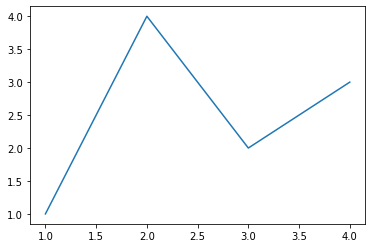

In [5]:
import matplotlib.pyplot as plt

plt.plot([1, 2, 3, 4], [1, 4, 2, 3])  # Matplotlib plot.

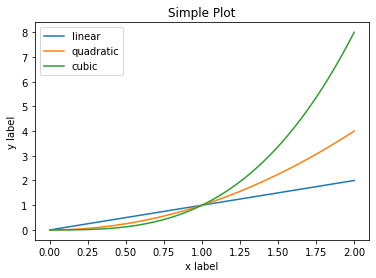

In [144]:
import numpy as np

x = np.linspace(0, 2, 100)
#print(x)
# Note that even in the OO-style, we use `.pyplot.figure` to create the figure.
fig, ax = plt.subplots()  # Create a figure and an axes.
ax.plot(x, x, label='linear')  # Plot some data on the axes.
ax.plot(x, x**2, label='quadratic')  # Plot more data on the axes...
ax.plot(x, x**3, label='cubic')  # ... and some more.
ax.set_xlabel('x label')  # Add an x-label to the axes.
ax.set_ylabel('y label')  # Add a y-label to the axes.
ax.set_title("Simple Plot")  # Add a title to the axes.
ax.legend()  # Add a legend.

Se pueden tener variables categóricas:

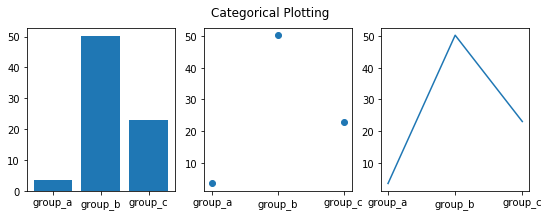

In [197]:
names = ['group_a', 'group_b', 'group_c']
values = [3.4, 50.3, 23]

plt.figure(figsize=(9, 3))

plt.subplot(131)
plt.bar(names, values)
plt.subplot(132)
plt.scatter(names, values)
plt.subplot(133)
plt.plot(names, values)
plt.suptitle('Categorical Plotting')
plt.show()

## 3. Pandas

Permite manipular datos de alto nivel. Es una librería fácil de usar para análisis y manipulación de datos. Está construida sobre Numpy.



In [166]:
dict = {"country": ["Brazil", "Russia", "India", "China", "South Africa", "Colombia"],
       "capital": ["Brasilia", "Moscow", "New Dehli", "Beijing", "Pretoria", "Bogotá"],
       "area": [8.516, 17.10, 3.286, 9.597, 1.221, 1.142],
       "population": [200.4, 143.5, 1252, 1357, 52.98, 49.65] }

import pandas as pd

brics = pd.DataFrame(dict)
print(brics)

        country    capital    area  population
0        Brazil   Brasilia   8.516      200.40
1        Russia     Moscow  17.100      143.50
2         India  New Dehli   3.286     1252.00
3         China    Beijing   9.597     1357.00
4  South Africa   Pretoria   1.221       52.98
5      Colombia     Bogotá   1.142       49.65


In [42]:
# Import pandas as pd
import pandas as pd
from collections import Counter
import datetime

ventasdf = pd.read_csv('files/SalesJan2009.csv')

#print(ventas)
cp = Counter(ventasdf['Country'])
print(cp.most_common(3))

cv = Counter(ventasdf['Payment_Type'])
print(cv.most_common(3))

#print(df)

[('United States', 462), ('United Kingdom', 100), ('Canada', 76)]
[('Visa', 521), ('Mastercard', 277), ('Amex', 110)]


In [45]:
ventasdf.head(2)

,Transaction_date,Product,Price,Payment_Type,Name,City,State,Country,Account_Created,Last_Login,Latitude,Longitude
0,1/2/2009 6:17,Product1,1200,Mastercard,carolina,Basildon,England,United Kingdom,1/2/2009 6:00,1/2/2009 6:08,51.500,-1.116667
1,1/2/2009 4:53,Product1,1200,Visa,Betina,Parkville,MO,United States,1/2/2009 4:42,1/2/2009 7:49,39.195,-94.681940


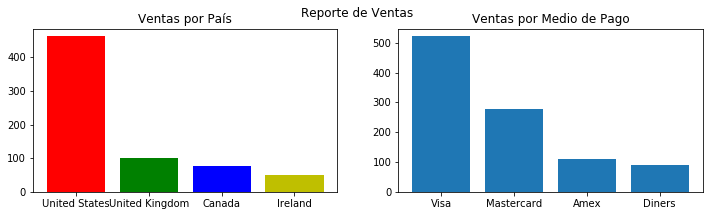

In [77]:
import numpy as np
import matplotlib.pyplot as plt

paises = [elem[0] for elem in cp.most_common(4)]
ventas = [elem[1] for elem in cp.most_common(4)]

mpago = [elem[0] for elem in cv.most_common(4)]
cantidad = [elem[1] for elem in cv.most_common(4)]

plt.figure(figsize=(12, 3))

plt.subplot(121)
plt.bar(paises, ventas, color=['r', 'g', 'b', 'y'])
plt.title('Ventas por País')

plt.subplot(122)
plt.bar(mpago, cantidad)
plt.title('Ventas por Medio de Pago')

plt.suptitle('Reporte de Ventas')
plt.show()

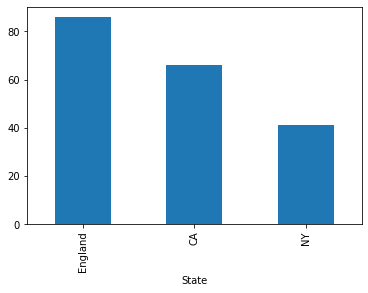

In [62]:
import matplotlib.pyplot as plt
ventasdf.groupby('State')['Product'].count().sort_values(
    ascending=False
)[:3].plot(kind='bar')

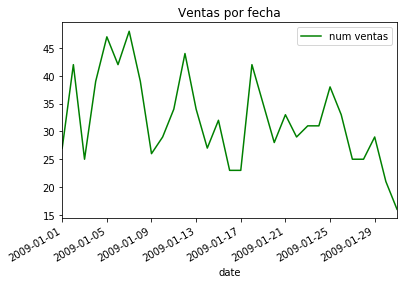

In [87]:
import pandas as pd
import datetime

#Reporte por fecha
ventasdf['Transaction_date'] = pd.to_datetime(ventasdf['Transaction_date'])

df = (ventasdf['Transaction_date']
       .dt.floor('d')
       .value_counts()
       .rename_axis('date')
       .reset_index(name='num ventas'))

ax = df.plot(x='date',y='num ventas',color='green',title='Ventas por fecha' )
plt.show()

## 4. NLTK, scikit-learn

NLTK es una plataforma para realizar programas que trabajen con lenguaje humano.

Scikit learn es una plataforma con herramientas para análisis de datos, reutilizable en varios contextos y basada en NumPy, SciPy y matplotlib.

A continuación un ejemplo de chatbot basado en:  https://medium.com/analytics-vidhya/building-a-simple-chatbot-in-python-using-nltk-7c8c8215ac6e, https://www.geeksforgeeks.org/removing-stop-words-nltk-python/ y http://josearcosaneas.github.io/python/r/procesamiento/lenguaje/2017/01/02/procesamiento-lenguaje-natural-0.html 

## 4.1 Carga de archivos

In [33]:
import nltk
import numpy as np
import random
import string #used to process python strings

In [34]:
with open('files/alternancia.txt','r', encoding='utf-8') as f:
    raw=f.read()
    raw=raw.lower() # converts to lowercase

nltk.download('punkt') # first-time use only
nltk.download('wordnet') # first-time use only

sent_tokens = nltk.sent_tokenize(raw)# converts to list of sentences 
word_tokens = nltk.word_tokenize(raw)# converts to list of words

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Arles\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Arles\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Ejemplo de sentencias:

In [35]:
sent_tokens[:2]

['en el próximo periodo académico 2020-2 habrá dos modalidades para el ofrecimiento del semestre académico: tomar todas las clases en forma remota y tomar las clases con el modelo de alternancia que implicará algunas actividades presenciales en el campus.',
 'en esta segunda modalidad se debe tener en cuenta que no todas las asignaturas tendrán presencialidad; es decir, habrá asignaturas 100% con sesiones sincrónicas remotas.']

Ejemplos de las palabras:

In [36]:
word_tokens[5:10]

['2020-2', 'habrá', 'dos', 'modalidades', 'para']

## 4.2 Preprocesamiento

In [37]:
import nltk

nltk.download('stopwords')
from nltk import wordpunct_tokenize
from nltk.corpus import stopwords
#import nltk
#from nltk.stem.porter import PorterStemmer
#from nltk.stem.Snowball import SnowballStemmer

stopw = [w.encode('utf-8') for w in stopwords.words('spanish')]
punc_lit = [u'.', u'[', ']', u',', u';', u'', u')', u'),', u' ', u'(']
stopw.extend(punc_lit)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Arles\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [38]:
from nltk.stem import SnowballStemmer

#print (SnowballStemmer.languages)
 
stemmer_spanish = SnowballStemmer('spanish')

def LemTokens(tokens):
    return [stemmer_spanish.stem(token) for token in tokens if token not in stopw]

remove_punct_dict = dict((ord(punct), None) for punct in string.punctuation)

def LemNormalize(text):
    return LemTokens(nltk.word_tokenize(text.lower().translate(remove_punct_dict)))

## 4.3 Emparejamiento de palabras clave:

Se definen saludos y despedidas para el bot. ELIZA (un chatbot popular utiliza un emparejamiento sencillo al azar para saludar).

In [39]:
GREETING_INPUTS = ("hola", "que más!", "cordial saludo", "hey!")

GREETING_RESPONSES = ["hola", "hey", "hola que hace!", "buenas las tenga", "a la orden?", "Es un gusto, pregunte pues!"]

def greeting(sentence):
    for word in sentence.split():
        if word.lower() in GREETING_INPUTS:
            return random.choice(GREETING_RESPONSES)

A continuación ya se muestra el motor del chatbot que está basado en el conteo de palabras para retornar la frase más parecida a la que el usuario digita:

In [40]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

from termcolor import colored

def response(user_response):
    robo_response=''
    sent_tokens.append(user_response)    
    TfidfVec = TfidfVectorizer(tokenizer=LemNormalize) #, stop_words='english')
    tfidf = TfidfVec.fit_transform(sent_tokens)
    vals = cosine_similarity(tfidf[-1], tfidf)
    idx=vals.argsort()[0][-2]
    flat = vals.flatten()
    flat.sort()
    req_tfidf = flat[-2]    
    if(req_tfidf==0):
        robo_response=robo_response+"Que pena no le entiendo nada... por favor pregunte otra cosa"
        return robo_response
    else:
        robo_response = robo_response+sent_tokens[idx]
        return robo_response

def main():
    flag=True
    print("ROBO: Soy un chatbot. Espero resolver todas sus preguntas sobre el modelo de alternancia de la konrad, para salir escriba chao")
    while(flag==True):
        user_response = input("You:")
        user_response=user_response.lower()
        if(user_response!='chao'):
            if(user_response=='gracias' or user_response=='Gracias!' ):
                flag=False
                print("ROBO: De nada..")
            else:
                if(greeting(user_response)!=None):
                    print("ROBO: "+greeting(user_response))
                else:
                    print(colored("ROBO: ", 'blue'),end="")
                    print(colored(response(user_response), 'blue'))
                    sent_tokens.remove(user_response)
        else:
            flag=False
            print(colored("ROBO: Nos vemos!", 'blue'))

main()

ROBO: Soy un chatbot. Espero resolver todas sus preguntas sobre el modelo de alternancia de la konrad, para salir escriba chao
You:Que pasará con la biblioteca?
ROBO: estarán activos todos los recursos electrónicos de biblioteca.
You:y la cafetería?
ROBO: se contempla el uso de la cafetería central y de la terraza del sexto piso del edificio central, manteniendo el distanciamiento físico de mesas y sillas.
You:y si quiero asistir presencialmente que debo hacer?
ROBO: quiero asistir a las sesiones presenciales de las asignaturas con modelo de alternancia.
You:que pasa con las clases?
ROBO: las personas que quieran tomar todas las clases remotas, no deben realizar ningún paso adicional a su matrícula y registro académico.
You:cuando terminará el covid?
ROBO: sí, siempre y cuando las autoridades nacionales y locales lo permitan.
You:chao
ROBO: Nos vemos!


# Referencias
- https://cs231n.github.io/python-numpy-tutorial/
- https://matplotlib.org/Matplotlib.pdf
- https://pandas.pydata.org/
- https://www.learnpython.org/es/Pandas%20Basics
- https://medium.com/analytics-vidhya/building-a-simple-chatbot-in-python-using-nltk-7c8c8215ac6e
- https://www.geeksforgeeks.org/removing-stop-words-nltk-python/
- http://josearcosaneas.github.io/python/r/procesamiento/lenguaje/2017/01/02/procesamiento-lenguaje-natural-0.html